## Курсовой проект: рекламный сервер
### Задание 1
## Розенвальд Михаль

Для того, чтобы исследовать инегрирование функций, воспользуемся сделанными ранее модулями и классами.

Нам понадобятся для тестирования три класса функций: гладки(полиномы), осциллирующие (x*sinx) и разрывные.

Класс функций полином. На примере полиномов будем рассматривать поведение гладких функций. 

In [1]:
class Polynomial(object):
    def __init__(self, coefficients):
        self.coeff = coefficients

    def __call__(self, x):
        # Return polinomial value
        s = 0
        for i in range(len(self.coeff)):
            s += int(self.coeff[i])*x**i
        return s

    def PolyPrint(self):
        if (len(self.coeff) == 0):
            return ('Empty function')
        poly_string = ''
        for i in range(len(self.coeff) - 1, 0, -1):
            poly_string += str(self.coeff[i]) + 'x^' + str(i) +' + '
        poly_string += str(self.coeff[0])

        return (poly_string)

    def __mul__(self, num):
        result_coeff = list(map(int, self.coeff[:])) # copy!
        for i in range(len(self.coeff)):
            result_coeff[i] *= num
        return Polynomial(result_coeff)


    def __add__(self, other):
        # Return self + other as Polynomial object
        # Start with the longest list and add in the other
        if len(self.coeff) > len(other.coeff):
            result_coeff = list(map(int, self.coeff[:]))  # copy
            for i in range(len(other.coeff)):
                result_coeff[i] += int(other.coeff[i])
        else:
            result_coeff = list(map(int, other.coeff[:])) # copy
            for i in range(len(self.coeff)):
                result_coeff[i] += int(self.coeff[i])
        return Polynomial(result_coeff)
    
    def differ_max(self):
        # only for polinoms with degree <= 2
        x_max = - float(self.coeff[1]) / (2*self.coeff[0])
        return self.coeff[1] + 2 * self.coeff[1] * x_max
    
    def lambda_func(self):
        # only for polinoms with degree <= 2
        return lambda x: self.coeff[0] + x * self.coeff[1]
    
    def lambda_func_ans(self, x):
        # only for polinoms with degree <= 2
        return self.coeff[0] + x * self.coeff[1]



In [2]:
poly = Polynomial([1,2,3])
print poly.PolyPrint()
print 'poly(0) = ', poly(0)
print 'poly(1) = ',poly(1)

3x^2 + 2x^1 + 1
poly(0) =  1
poly(1) =  6


Сделаем класс, отражающий поведение осциллирующих, на частном примере функции x*sin(x).


In [3]:
import numpy as np

class Oscillation_sin(object):
    # f(x) = x * sin(x)
    def __init__(self):
        self.coeff = 1
        
    def __call__(self, x):
        # Return Oscillation_sin value
        s = x * np.sin(x)
        return s
    
    def OscPrint(self):
        osc_string = "x * sin(x)"
        return (osc_string)
    
    def differ_max(self):
        return 1.819  # when x in [-5, 5]
    
    def lambda_func(self):
        return lambda x: x * np.sin(x)


In [4]:
osc = Oscillation_sin()
print osc.OscPrint()
print 'osc(0) = ', osc(0)
print 'osc(1) = ', osc(1)

x * sin(x)
osc(0) =  0.0
osc(1) =  0.841470984808


Разрывные функции будем задавать кусочно, как два разлиных полинома, заданных на интервалах poly_a на (-inf; x_0) и poly_b на [x_0; inf).

$f(x) = \begin{cases} a_1 x + a_0 & x < x_0 \\ b_1 x + b_0 & x \geq x_0 \end{cases}$

In [5]:
class Discontinuous(object):
    # poly_a with coeffs (a_1, a_0) when x in  (-inf; x_0), esle - poly_b with coeffs (b_1, b_0)
    def __init__(self, coefficients_a, coefficients_b, x_0):
        self.coeff_a = coefficients_a
        self.coeff_b = coefficients_b
        self.poly_a = Polynomial(coefficients_a)
        self.poly_b = Polynomial(coefficients_b)
        self.x_0 = x_0

    def __call__(self, x):
        # Return polinomial value
        if (x < self.x_0):
            s = self.poly_a(x)
        else:
            s = self.poly_b(x)
        return s
    
    def DiscontinPrint(self):
        disc_string = self.poly_a.PolyPrint() + " , x < " + str(self.x_0) + '\n' + self.poly_b.PolyPrint() + " , x > " + str(self.x_0) 
        return (disc_string)
    
    def differ_max(self):
        return max( self.poly_a.differ_max(), self.poly_b.differ_max())
    
    def lambda_func(self):
        return lambda x: (self.poly_a.coeff[0] + x * self.poly_a.coeff[0]) if x < self.x_0 else (self.poly_b.coeff[0] + x * self.poly_b.coeff[0])
    

In [6]:
disc = Discontinuous([1, 2], [2, 3], 0)
print 'disc function : \n', disc.DiscontinPrint()
print 'disc(0) = ', disc(0)
print 'disc(-0.1) = ', disc(-0.1)
print 'disc(0.1) = ', disc(0.1)

disc function : 
2x^1 + 1 , x < 0
3x^1 + 2 , x > 0
disc(0) =  2
disc(-0.1) =  0.8
disc(0.1) =  2.3


Кроме этого, нам необходим метод табулирования, так как мы хотим работать с поточечными заданиями функций.

In [7]:
import pandas as pd

def Tabulate(func, x_steps):
    values = []
    for i in range(len(x_steps)):
        values.append(func(x_steps[i]))

    tabu_df = pd.DataFrame(columns=('x', 'val'))
    tabu_df['x'] = x_steps
    tabu_df['val'] = values
    return tabu_df

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

3x^2 + 2x^1 + 1
       x       val
0 -1.000  2.000000
1 -0.984  1.936768
2 -0.968  1.875072
3 -0.952  1.814912
4 -0.936  1.756288


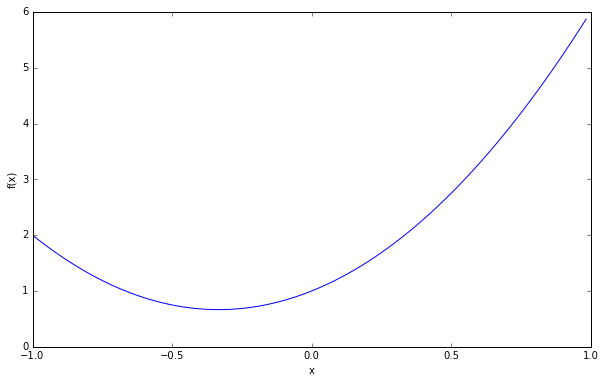

In [9]:
poly = Polynomial([1, 2, 3])
print poly.PolyPrint()
step_len = 0.016
x_steps = np.arange(-1, 1, step_len)
poly_tabu_df = Tabulate(poly, x_steps)
print poly_tabu_df.head()
plt.figure(figsize=(10,6))
plt.plot(poly_tabu_df['x'], poly_tabu_df['val'], label = "Polynomial Function")
plt.xlabel("x")
plt.ylabel("f(x)")

x * sin(x)
        x       val
0 -10.000 -5.440211
1  -9.984 -5.296781
2  -9.968 -5.152428
3  -9.952 -5.007195
4  -9.936 -4.861123


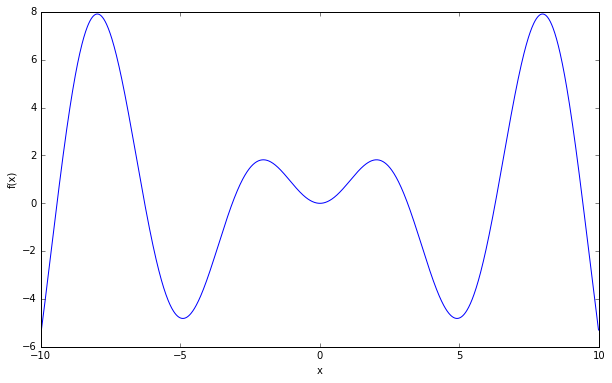

In [10]:
osc = Oscillation_sin()
print osc.OscPrint()
step_len = 0.016
x_steps = np.arange(-10, 10, step_len)
osc_tabu_df = Tabulate(osc, x_steps)
print osc_tabu_df.head()

plt.figure(figsize=(10,6))
plt.plot(osc_tabu_df['x'], osc_tabu_df['val'], label = "x * sin(x)")
plt.xlabel("x")
plt.ylabel("f(x)")

2x^1 + 1 , x < 0
4x^1 + 3 , x > 0
       x    val
0 -1.000 -1.000
1 -0.984 -0.968
2 -0.968 -0.936
3 -0.952 -0.904
4 -0.936 -0.872


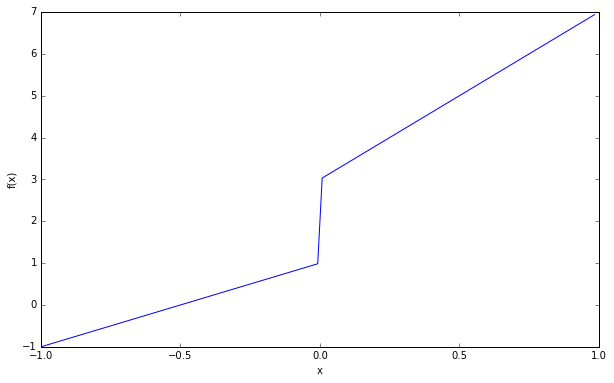

In [11]:
disc = Discontinuous([1,2], [3, 4], 0)
print disc.DiscontinPrint()
step_len = 0.016
x_steps = np.arange(-1, 1, step_len)
disc_tabu_df = Tabulate(disc, x_steps)
print disc_tabu_df.head()

plt.figure(figsize=(10,6))
plt.plot(disc_tabu_df['x'], disc_tabu_df['val'], label = "Discontinuous Function")
plt.xlabel("x")
plt.ylabel("f(x)")

## Руализуем модуль численного интегрирования.
### Методом левых прямоугольников 
из семейства Ньютона-Котеса $f(x)$.


Простая формула на отрезке $[a, b] : I = f(a) (b - a)$

Составная формула для отрезка $[a, b] : I = \sum_{i=0}^{n-1}(f(x_{i})(x_{i+1} - x_{i})) \approx \int_{a}^{b}f(x)dx$ , где $[x_{i}, x_{i+1}]$ - разьбиения [a, b]

In [12]:
# Для аналитически заданной функции из реализованного класса 
def integrate_func_simple(func, a, b):
    I = func(a) * (b - a)
    return I

In [13]:
# Для табулированной функции
def integrate_tabu(func_tabu_df, a, b):
    f_a = func_tabu_df[func_tabu_df['x'] == a]['val'].values[0]  # tabulated value of func at x = a
    I = f_a * (b - a)
    return I

In [14]:
def integrate_tabu_full(func_tabu_df):
    steps_number = func_tabu_df.shape[0]
    I = 0
    for i in range(steps_number - 1):
        I += func_tabu_df['val'][i] * (func_tabu_df['x'][i + 1] - func_tabu_df['x'][i])
    return I

In [15]:
def integrate_rectangle(func, a, b, steps_num):
    x_steps = np.linspace(a, b, num=steps_num)
    func_tabu_df = Tabulate(func, x_steps)
    return integrate_tabu_full(func_tabu_df)


In [1]:
def integrate_rectangle(func, a, b, steps_number):
    x_steps = np.linspace(a, b, num=steps_number)
    func_tabu_df = Tabulate(func, x_steps)
    I = 0
    for i in range(steps_number - 1):
        I += func_tabu_df['val'][i] * (func_tabu_df['x'][i + 1] - func_tabu_df['x'][i])
    return I


### Погрешность для равномерной сетки: $E(f) = \frac{(b-a)^2}{2n} |\max_{x \in [a,b]} (f'(x))|$, n - число отрезков (steps_num)
Это является аналитической оценкой сверху.

Для того, чтобы считать ошибки, добавим в классы методы вычисления максимум первой производной для частных случаев функций.

In [16]:
def error_analyt(func, a, b, steps_num):
    return float(((b - a) ** 2) * abs(func.differ_max())) / (2*steps_num)

### Найдем практическую ошибку. 
Будем вычислять разницу между вычесленны методом левых прямоугольников интегралом и результатом интегрирования функции quad пакета scipy.integrate

In [17]:
from scipy.integrate import quad
def integrate_scipy(func, a, b):
    return quad(func.lambda_func(), a, b)[0]

In [18]:
def error_estimate(func, a, b, steps_num):
    return abs(integrate_scipy(func, a, b) - integrate_rectangle(func, a, b, steps_num))

### Исследуем зависимость практической ошибки от изменения размера шага сетки,
т.е. от количества элементов на отрезке.

Будем рассматривать изменения в вычислениях интегралов изменяя колличество узлов (step_nums) от 10 до 100.

Для этого будем строить график разниц вычисления методом прямоугольников с различными сетками и интегралом функции quad.

In [19]:
def errors_step_nums(func, a, b, show = True):    
    step_nums = np.arange(10, 100, 1)
    err_analyts = np.array([error_analyt(func, a, b, steps) for steps in step_nums])

    I_rect = np.array([integrate_rectangle(func, a, b, steps) for steps in step_nums])
    I_scipy = integrate_scipy(func, a, b)
    err_estimate = np.abs(I_scipy - I_rect)
    
    if show:
        plt.figure(figsize=(10,6))
        plt.plot(step_nums, err_analyts, label='Analytical Error', color='g')
        plt.plot(step_nums, err_estimate, label='Estimated Error', color='b')
        plt.gca().set_xscale('log')
        plt.gca().set_yscale('log')
        plt.legend(loc=3)
        plt.xlabel("Log(step_num)")
        plt.ylabel("Log(Error)")
    return step_nums, I_rect, I_scipy, err_analyts, err_estimate

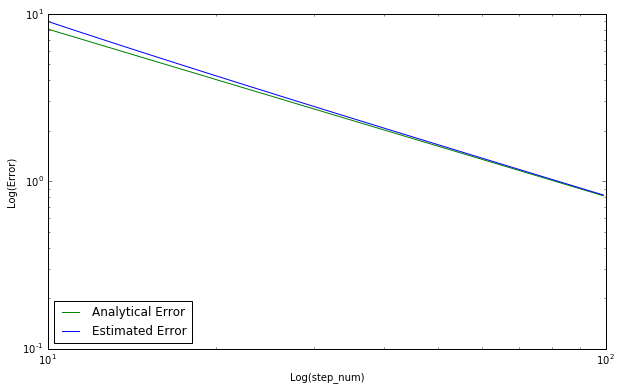

In [20]:
a = 1
b = 10
func = Polynomial([1,2])
step_nums, I_rect, I_scipy, err_analyts, err_estimate = errors_step_nums(func, a, b)

## Рассмотрим применение функций вычисления интеграла на трёх типах функций, описанных выше

### Полиномы:

2x^1 + 1
Интеграл на [ -1 , 6 ] с сеткой с  100 узлами

Метод прямоугольников 41.5050505051
Метод scipy.integrate.quad 42.0
Отношение ошибок интегрирования (рис.1)


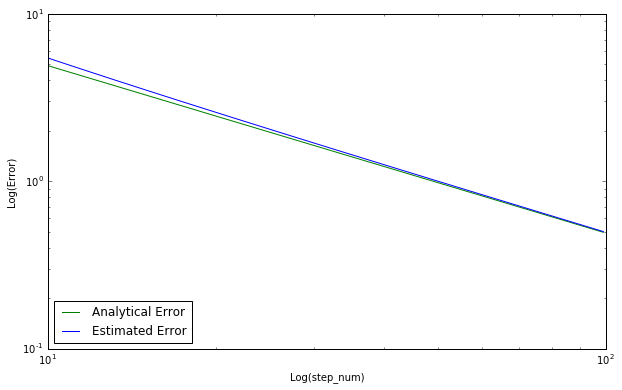

In [32]:
poly = Polynomial([1, 2])
print poly.PolyPrint()
a = -1
b = 6
steps_num = 100
print "Интеграл на [", a, ",", b, "] с сеткой с ", steps_num, "узлами\n"
print "Метод прямоугольников" , integrate_rectangle(poly, a, b, steps_num)
print "Метод scipy.integrate.quad" , integrate_scipy(poly, a, b)
print "Отношение ошибок интегрирования (рис.1)"
step_nums, I_rect, I_scipy, err_analyts, err_estimate = errors_step_nums(poly, a, b, show = True)

x * sin(x)
Интеграл на [ -10 , 10 ] с сеткой с  1000 узлами

Метод прямоугольников 15.6927915131
Метод scipy.integrate.quad 15.6933883598
Отношение ошибок интегрирования (рис.1)


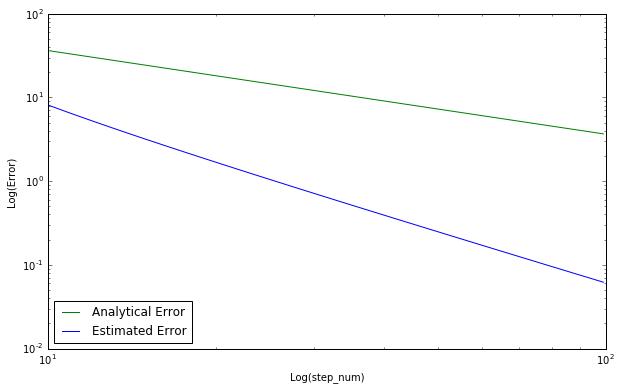

In [35]:
osc = Oscillation_sin()
print osc.OscPrint()
a = -10
b = 10
steps_num = 1000
print "Интеграл на [", a, ",", b, "] с сеткой с ", steps_num, "узлами\n"
print "Метод прямоугольников" , integrate_rectangle(osc, a, b, steps_num)
print "Метод scipy.integrate.quad" , integrate_scipy(osc, a, b)
print "Отношение ошибок интегрирования (рис.1)"
step_nums, I_rect, I_scipy, err_analyts, err_estimate = errors_step_nums(osc, a, b, show = True)

2x^1 + 1 , x < 0
4x^1 + 3 , x > 0
Интеграл на [ -10 , 10 ] с сеткой с  4000 узлами

Метод прямоугольников 139.844967493
Метод scipy.integrate.quad 140.0
Отношение ошибок интегрирования (рис.1)


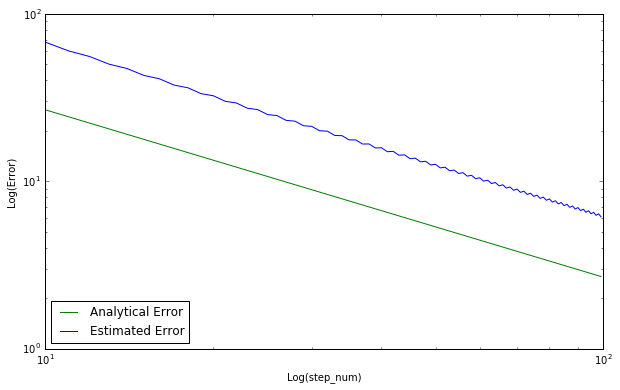

In [34]:
print disc.DiscontinPrint()
a = -10
b = 10
steps_num = 4000
print "Интеграл на [", a, ",", b, "] с сеткой с ", steps_num, "узлами\n"
print "Метод прямоугольников" , integrate_rectangle(disc, a, b, steps_num)
print "Метод scipy.integrate.quad" , integrate_scipy(disc, a, b)
print "Отношение ошибок интегрирования (рис.1)"
step_nums, I_rect, I_scipy, err_analyts, err_estimate = errors_step_nums(disc, a, b, show = True)

### Применив оба метода вычисления интегралов (метор прямоугольников и реализованный пакетом scipy.integrate.quad) мы получили очень плизкие значения на каждом из рассмотренных случаев типов кривых.

А графики, показывающие порядок ошибки логорифма аналитической и  экспериментальной ошибки метод оказались различными.

#### При этом заметим, что все кривые имеют наклон свидейтельствующий о том, что с увеличением колличества узлов в сетке (от 10 до 100), ошибка уменьшается.

Для построенной гладкой функции полиному ошибки (как аналитическая, так и практическая) падают на порядок при изменении на порядок число узлов. Для функции x*sin(x) аналитическая ошибка оказалась выше и меньше изменяется, чем фактическая. А для кусочно-заданной функции наоборот, аналитическая ошибка меньше эксперементальной.